In [1]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
distr_table = pd.DataFrame({
    'X':[0,0,1,1],
    'Y':[1,2,1,2],
    'pr':[0.3,.25,.15,.3]
})

In [25]:
class Check_Independence:
    
    def __init__(self):
        self_version=1
    
    def check_independence(self, distr_table:pd.DataFrame):
        df = distr_table
        countX = Counter(df['X'])
        countY = Counter(df['Y'])
        totalX = sum(countX.values())
        totalY = sum(countY.values())
        probX = {k:v/totalX for k,v in countX.items()}
        probY = {k:v/totalY for k, v in countY.items()}
        df['prob_X'] = df['X'].replace(probX)
        df['prob_Y'] = df['Y'].replace(probY)
        df['X and Y'] = df['prob_X']* df['prob_Y']
        df['independence'] = np.where(df['pr']==df['X and Y'], True, False)
        c =df['independence'].eq(True).all()
        
        df['X - Xmean']  = df['X']- df['X'].mean()
        df['Y - Ymean']  = df['Y']- df['Y'].mean()
        df['covX*Y'] = df['X - Xmean']*df['Y - Ymean']
        Var= df['covX*Y'].sum()
        
        df['stdX']  = df['X - Xmean'].pow(2)
        df['stdY']  = df['Y - Ymean'].pow(2)
        Corr = Var/((df['stdX'].sum()**.5)  * (df['stdY'].sum()**.5))
        return print("Independence :",c, '\nVariance :',Var,'\nCorrelation :', Corr)
        

In [26]:
obj = Check_Independence()
obj.check_independence( distr_table)

Independence : False 
Variance : 0.0 
Correlation : 0.0


In [31]:
corr(distr_table['X'],distr_table['Y'])

TypeError: 'numpy.float64' object is not callable

In [32]:
x = 1.2525
round(x,2)

1.25

In [5]:
x = np.arange(0,16)
y= [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
pr = [0,0,0,0.25,0,0,0.25,0,0,0.25,0,0,.25,0,0,0]

df1 = pd.DataFrame(list(zip(x, y,pr)), columns = ('X','Y','pr'))
df1

,X,Y,pr
0,0,0,0.00
1,1,0,0.00
2,2,0,0.00
3,3,0,0.25
4,4,1,0.00
5,5,1,0.00
6,6,1,0.25
7,7,1,0.00
8,8,2,0.00
9,9,2,0.25


In [7]:
df1.to_csv('test_data.csv')

In [8]:
obj = Check_Independence()
obj.check_independence( df1)

Independence : False 
Variance : 80.0 
Correlation : 0.9701425001453319


In [9]:
import statistics 
print("Variance of sample X set is % s" 
      %(statistics.variance(df1['X']))) 
print("Variance of sample Y set is % s" 
      %(statistics.variance(df1['Y']))) 
print("Variance of sample pr set is % s" 
      %(statistics.variance(df1['pr']))) 

Variance of sample X set is 22.666666666666668
Variance of sample Y set is 1.3333333333333333
Variance of sample pr set is 0.0125


In [11]:
from scipy.stats import pearsonr
# seed random number generator
#seed(1)
# prepare data
#data1 = 20 * randn(1000) + 100
#data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(df1['X'], df1['Y'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.970


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

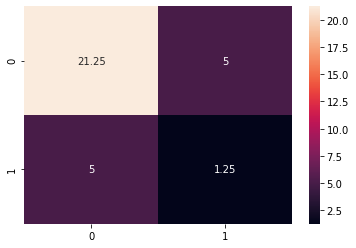

In [13]:
data = np.array([x,y])
covMatrix = np.cov(data,bias=True)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [14]:
df1['col3'].eq(True).all()

KeyError: 'col3'

In [37]:
class AnalysisDataAndFitLinearRegression:
    
    def __init__(self):
        self.version = 1
    
    def analyse_and_fit_lrm(self, path):
        # path realest.csv
        df = pd.read_csv(path)
        c_prev = len(df['Price'])
        # Deleting list wise method
        df = df.dropna()
        c_after = len(df['Price'])
        print('No. of row deleted:', c_prev - c_after)
        
        df2 = pd.DataFrame(df['Tax'][df['Bathroom']==2])
        df3 = pd.DataFrame(df['Tax'][df['Bedroom']==4])
        df4 = df3.merge(df2)
        statistics = []
        statistics = [df4.mean(), df4.std(),df4.median(),df4.max(),df4.min() ]
        #statistics
        
        data_frame = df[df['Space']>800]
        data_frame = data_frame.sort_values('Price', ascending =False)
        
        df80 = df['Lot'].quantile(.08)
        number_of_observations = len(df[df['Lot']>= df80])
        
        summary_dict = {
            'statistics' :statistics,
            'data_frame' : data_frame,
            'number_of_observations' : number_of_observations
        }
        
        lr = LinearRegression()
        x = df.drop(['Price'], axis=1)
        y = df['Price']
        # Fit the data(train the model)
        lr.fit(x, y)
        model_parameters = {
            'Intercept' : lr.intercept_,
            'Bedroom':lr.coef_[0] , 'Space':lr.coef_[1], 'Room':lr.coef_[2], 'Lot':lr.coef_[3],
            'Tax':lr.coef_[4], 'Bathroom':[5], 'Garage':[6],'Condition':lr.coef_[7]
        }
        
        
        #var = [3.00,1500.00,8.00,40.00,1000.00,2.00,1.00,0.00]
        var = pd.DataFrame({ 'Bedroom': 3,
            'Space' :[1500],
            'Room': [8],
            'Lot': [40],
            'Tax':[1000],
            'Bathroom':[2] ,
            'Garage':[1],
            'Condition':[0]})
        #pred = lr.predict(np.array([var]))
        pred = lr.predict(var.ravel())
        
        regression_dict = {
            'model_parameters' : model_parameters,
            'price_prediction' : pred
        }
        return (summary_dict, regression_dict)
        
        

In [40]:
var = pd.DataFrame({ 'Bedroom': [3],
            'Space' :[1500],
            'Room': [8],
            'Lot': [40],
            'Tax':[1000],
            'Bathroom':[2] ,
            'Garage':[1],
            'Condition':[0]})
var

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,3,1500,8,40,1000,2,1,0


In [41]:
lr = LinearRegression()
df = pd.read_csv('realest.csv')
df = df.dropna()
x = df.drop(['Price'],axis =1)
y = df['Price']
lr.fit(x,y)

LinearRegression()

In [44]:
model_parameters = {
            'Intercept' : lr.intercept_,
            'Bedroom':lr.coef_[0] , 'Space':lr.coef_[1], 'Room':lr.coef_[2], 'Lot':lr.coef_[3],
            'Tax':lr.coef_[4], 'Bathroom':lr.coef_[5], 'Garage':lr.coef_[6],'Condition':lr.coef_[7]
        }
model_parameters

{'Intercept': 19.993467728068083,
 'Bedroom': -3.160238735960707,
 'Space': 0.00966322779633437,
 'Room': 1.6889511073197696,
 'Lot': 0.23621323117136875,
 'Tax': 0.004412718519150623,
 'Bathroom': 6.375785992212346,
 'Garage': 4.1447574268488,
 'Condition': 1.8357953743202897}

In [48]:
pred = lr.predict(var)
pred = pred.astype(float)
round(pred[0],2)

69.28

In [38]:
obj = AnalysisDataAndFitLinearRegression()
obj.analyse_and_fit_lrm('realest.csv')

No. of row deleted: 29


AttributeError: 'DataFrame' object has no attribute 'ravel'

In [18]:
df = pd.read_csv('realest.csv')

In [20]:
df2 = pd.DataFrame(df['Tax'][df['Bathroom']==2])
df2

,Tax
5,960.0
16,734.0
17,NaN
23,440.0
25,900.0
31,948.0
42,722.0
43,554.0
49,470.0
51,867.0
